<a href="https://colab.research.google.com/github/fattahar/Finalterm-machine-learning/blob/main/Finalterm_transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=da39ccb4-029b-4a4b-b966-39de5df0afdb
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:10<00:00, 59.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=34a3d094-92bd-46b5-9f85-a9ce11099760
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:10<00:00, 63.4MB/s]
Download completed


In [ ]:
import pandas as pd
import a as pl

BASE_PATH = "midterm_folder"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape) #590540 row dan 393 feature + 1 target
print(test_transaction.shape) #506691 row dan 393 feature

(590540, 394)
(506691, 393)


In [ ]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


# 1. SETUP & UTILITIES

In [3]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score

# Konfigurasi Tampilan
pd.set_option('display.max_columns', None)

# --- FUNGSI PENGHEMAT MEMORI (CRITICAL) ---
def reduce_mem_usage(df):
    """ Mengurangi penggunaan memori dengan mengubah tipe data """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage awal: {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min, c_max = df[col].min(), df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                else:
                    df[col] = df[col].astype(np.float32)

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage akhir: {end_mem:.2f} MB ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# 2. DATA INGESTION & FEATURE ENGINEERING

In [4]:
# A. Load Data
BASE_PATH = "/content/finalterm_folder"
print("Loading datasets...")
train = pd.read_csv(f'{BASE_PATH}/train_transaction.csv')
test = pd.read_csv(f'{BASE_PATH}/test_transaction.csv')

# B. Time Engineering (Membuat fitur baru dari TransactionDT)
print("Creating Time Features...")
for df in [train, test]:
    # Mengubah detik menjadi Jam (0-23) dan Hari (0-6)
    df['hour'] = (df['TransactionDT'] // 3600) % 24
    df['day'] = (df['TransactionDT'] // (3600 * 24)) % 7

# C. Frequency Encoding (Menangkap pola kartu/alamat aneh)
# Mengubah kolom kategori menjadi angka frekuensi kemunculannya
print("Creating Frequency Features...")
cat_cols = ['card1', 'card2', 'addr1', 'P_emaildomain']

for col in cat_cols:
    # Gabung train+test untuk hitungan global yang akurat
    temp = pd.concat([train[[col]], test[[col]]])
    col_count = temp[col].value_counts().to_dict()

    train[col + '_count'] = train[col].map(col_count)
    test[col + '_count'] = test[col].map(col_count)

# D. Label Encoding untuk sisa kolom String/Object
print("Encoding Categorical Strings...")
for col in train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    # Fit pada gabungan data agar semua label dikenal
    le.fit(list(train[col].astype(str)) + list(test[col].astype(str)))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# E. Optimization
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
print("Data Preparation Done!")

Loading datasets...
Creating Time Features...
Creating Frequency Features...
Encoding Categorical Strings...
Memory usage awal: 1802.19 MB


/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning:

Memory usage akhir: 496.16 MB (72.5% reduction)
Memory usage awal: 1542.43 MB


/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning:

Memory usage akhir: 432.96 MB (71.9% reduction)
Data Preparation Done!


/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1606570763.py:34: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:


# 3. BENCHMARK MODEL: LIGHTGBM

In [5]:
# A. Split Data
X = train.drop(['isFraud', 'TransactionID', 'TransactionDT'], axis=1) # Drop DT karena sudah ada hour/day
y = train['isFraud']

# Stratified Split (Penting untuk Imbalanced Data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# B. Define & Train Model
print("Training LightGBM...")
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    is_unbalance=True,  # Handle Imbalance otomatis
    n_jobs=-1,
    random_state=42
)

lgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
)

# C. Save Prediction
preds_lgb = lgb_clf.predict_proba(X_val)[:, 1]
print(f"LightGBM Validation AUC: {roc_auc_score(y_val, preds_lgb):.4f}")

Training LightGBM...
[LightGBM] [Info] Number of positive: 16530, number of negative: 455902
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.756604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37107
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 396
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034989 -> initscore=-3.317101
[LightGBM] [Info] Start training from score -3.317101
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.920254
[200]	valid_0's auc: 0.934219
[300]	valid_0's auc: 0.940982
[400]	valid_0's auc: 0.946113
[500]	valid_0's auc: 0.949732
[600]	valid_0's auc: 0.952923
[700]	valid_0's auc: 0.955208
[800]	valid_0's auc: 0.957002
[900]	valid_0's auc: 0.958604
[1000]	valid_0's auc: 0.960156
Did not meet early stopping. Best iteration is:
[1000]	

# 4. CHALLENGER MODEL: DEEP NEURAL NETWORK

In [6]:
# A. Scaling (Wajib untuk NN)

print("Scaling Data for Neural Network...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.fillna(0))
X_val_scaled = scaler.transform(X_val.fillna(0))

# B. Build Architecture
model_dl = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),

    # Layer 1
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(), # Menstabilkan learning
    layers.Dropout(0.3),         # Mencegah menghapal data (overfitting)

    # Layer 2
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Layer 3
    layers.Dense(64, activation='relu'),

    # Output Layer (Sigmoid untuk probabilitas 0-1)
    layers.Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['AUC'])

# C. Train Model
print("Training Neural Network...")
history = model_dl.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=2048, # Batch besar mempercepat training
    class_weight={0:1, 1:4}, # Memberi bobot 4x lipat pada kelas Fraud
    callbacks=[callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

# D. Save Prediction
preds_dl = model_dl.predict(X_val_scaled).flatten()
print(f"Deep Learning Validation AUC: {roc_auc_score(y_val, preds_dl):.4f}")

Scaling Data for Neural Network...
Training Neural Network...
Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - AUC: 0.7801 - loss: 0.3710 - val_AUC: 0.8694 - val_loss: 0.1290
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - AUC: 0.8580 - loss: 0.2793 - val_AUC: 0.8789 - val_loss: 0.1128
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - AUC: 0.8710 - loss: 0.2692 - val_AUC: 0.8876 - val_loss: 0.1096
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - AUC: 0.8779 - loss: 0.2606 - val_AUC: 0.8922 - val_loss: 0.1118
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - AUC: 0.8878 - loss: 0.2513 - val_AUC: 0.8965 - val_loss: 0.1117
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - AUC: 0.8898 - loss: 0.2487 - val_AUC: 0.9004 - val_loss: 0.1045
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - AUC: 0.8963 - loss: 0.2432 - val_AUC: 0.9023 - val_loss: 0.1071
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - AUC: 0.8993 - loss: 0.2360 - val_AUC: 0.90

# 5. EVALUATION

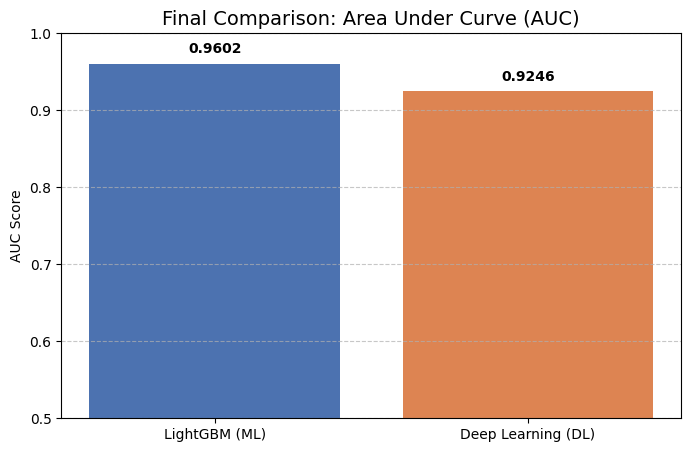

Generating Submission using LightGBM...


In [7]:
# A. Visualisasi Perbandingan
auc_lgb = roc_auc_score(y_val, preds_lgb)
auc_dl = roc_auc_score(y_val, preds_dl)

plt.figure(figsize=(8, 5))
bars = plt.bar(['LightGBM (ML)', 'Deep Learning (DL)'], [auc_lgb, auc_dl],
               color=['#4c72b0', '#dd8452'])
plt.ylim(0.5, 1.0)
plt.title('Final Comparison: Area Under Curve (AUC)', fontsize=14)
plt.ylabel('AUC Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontweight='bold')
plt.show()

# B. Generate Submission
print("Generating Submission using LightGBM...")

# Siapkan test data
X_test_final = test.drop(['TransactionID', 'TransactionDT'], axis=1)
X_test_final = X_test_final[X_train.columns] # Pastikan urutan kolom sama

# Prediksi
final_probs = lgb_clf.predict_proba(X_test_final)[:, 1]

# 6. SUBMISSION

In [8]:
# Simpan CSV
submission = pd.DataFrame({
    'TransactionID': test['TransactionID'],
    'isFraud': final_probs
})
submission.to_csv('submission_final.csv', index=False)
print("✅ Submission file saved successfully: submission_final.csv")

✅ Submission file saved successfully: submission_final.csv
